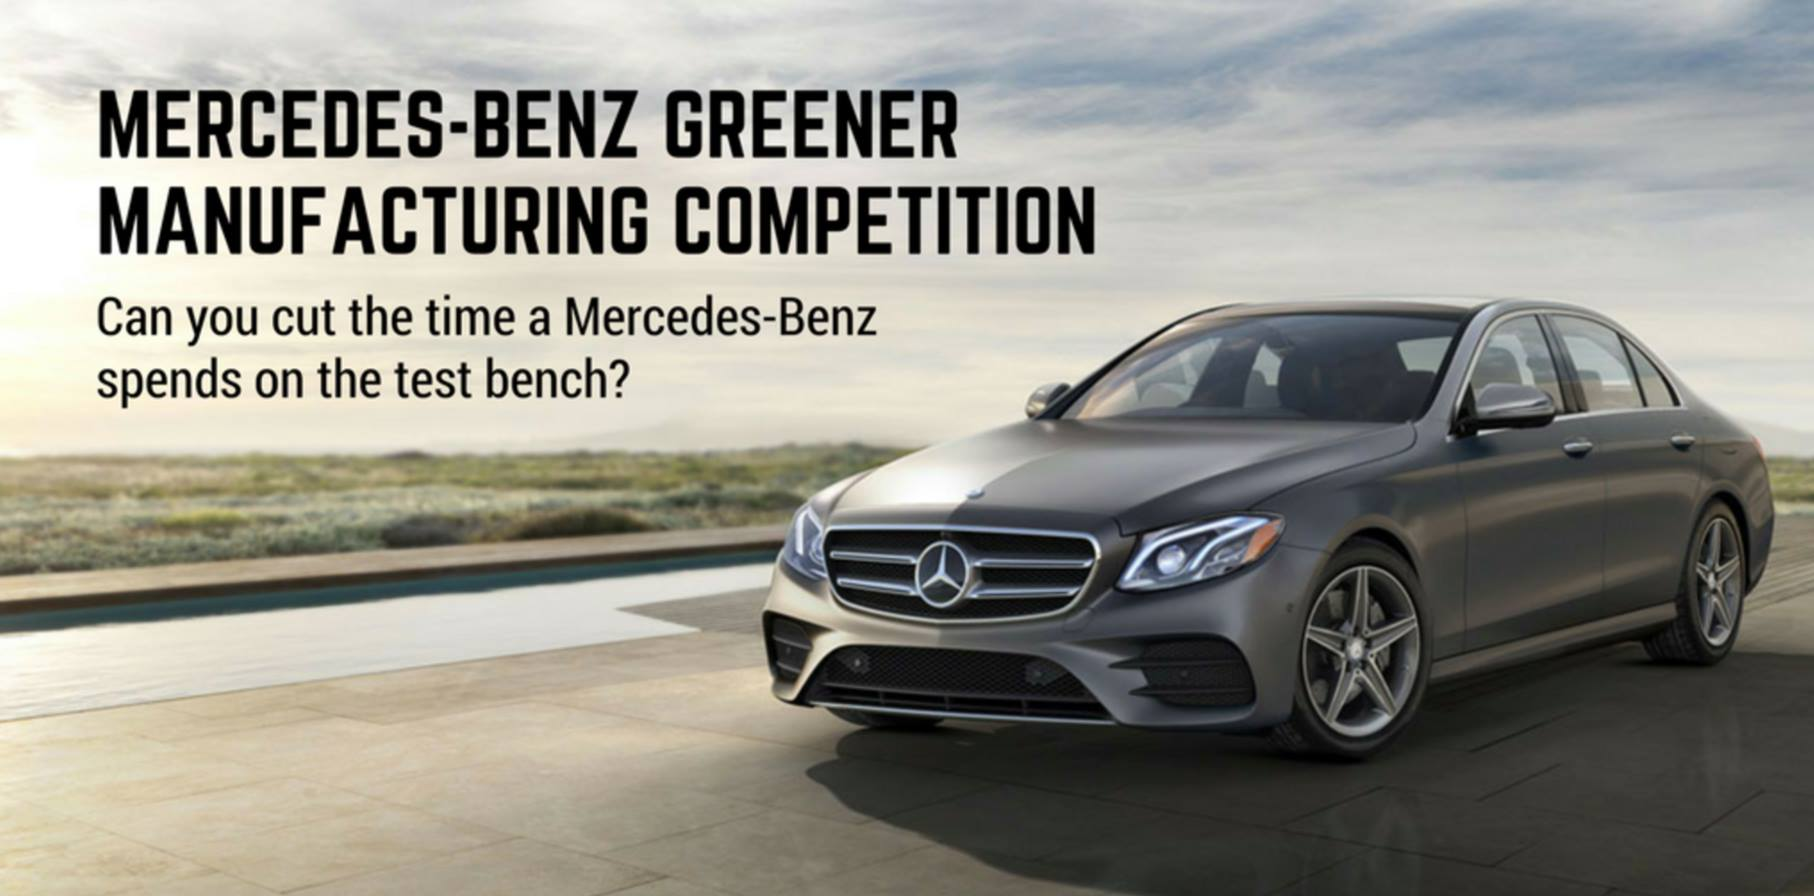

# USE CASE

<b>DESCRIPTION</b>

Reduce the time a Mercedes-Benz spends on the test bench.

<b>Problem Statement Scenario:</b><br>
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.<br>

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

<p style="font-size:16px"><b>TASKS:</b></p>

<b>Following actions should be performed:</b><br>
&emsp;&emsp;1.If for any column(s), the variance is equal to zero, then you need to remove those variable(s).<br>
&emsp;&emsp;2.Check for null and unique values for test and train sets.<br>
&emsp;&emsp;3.Apply label encoder.<br>
&emsp;&emsp;4.Perform dimensionality reduction.<br>
&emsp;&emsp;5.Predict your test_df values using XGBoost.<br>

### IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv("C:/Users/VAIO/Downloads/SimpliLearn/Machine Learning/Assessments/Mercedes-Benz/train.csv")
data_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
 data_test = pd.read_csv("C:/Users/VAIO/Downloads/SimpliLearn/Machine Learning/Assessments/Mercedes-Benz/test.csv")
data_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


### DATA ANALYSIS

<p style="font-size:16px;">Verify total no of records and features in train data set</p>

In [4]:
print("Total records present in train data: ", data_train.shape, "\n")
print("Total records present in test data: ", data_test.shape, "\n")

Total records present in train data:  (4209, 378) 

Total records present in test data:  (4209, 377) 



<p style="font-size:16px;">Verify the Label feature</p>

<p style="font-size:16px;"><b>Observation:</b> We can analyze that the train data has <b>378 records</b>, however test data has only <b>377 records</b>. There is a missing column in the Test data. Lets verify the missing data in the Test Data</p>

In [5]:
for i in data_train.columns:
    if i in data_test.columns:
        continue
    else: 
        print("The column not present in Test Data is: ", i)

The column not present in Test Data is:  y


<p style="font-size:16px;"> <b>Analysis:</b> Since <b>y</b> is not present in the Test Data, Hence it is the <b>Output Variable</b></p>

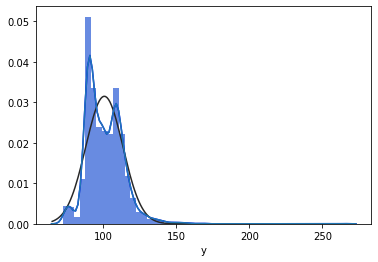

In [6]:
# To detect any outliers, plot the y values.
sns.distplot(data_train.y, fit = norm, color='blue')
sns.distplot(data_train.y)
plt.show()

<p style="font-size:16px;">Verify the information about the data</p>

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


<b>Train data has 3 different data type features:</b><br>
<b>Float :</b>  1 Feature<br>
<b>Int   :</b>  369 features<br>
<b>Object:</b>  8 features

In [8]:
numericfeatures = [col for col in data_train.columns if (data_train[col].dtype == 'float64') 
                   | (data_train[col].dtype == 'int64') & (col != 'Target')]

In [9]:
objectfeatures = [obj for obj in data_train.columns if data_train[obj].dtype == 'object']
objectfeatures

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

### TASK 1: If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [10]:
dataVariance = data_train.var()
toBeDroppedRows = dataVariance[dataVariance == 0].index.to_list()
toBeDroppedRows

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [11]:
data_train.drop(toBeDroppedRows,axis=1,inplace=True)

In [12]:
data_train.shape

(4209, 366)

### TASK 2: Verify Null Values in Train Data

<p style="font-size:16px;color:SlateBlue">Dropping off the column names from <b>numericfeatures</b> which has <b>variance=0</b></p>

In [13]:
toBeDroppedRows = set(toBeDroppedRows)
numericfeatures = [items for items in numericfeatures if items not in toBeDroppedRows]

In [14]:
nullValues = data_train[numericfeatures].isnull().sum()
nullValues[nullValues > 0]

Series([], dtype: int64)

In [15]:
data_train[objectfeatures].isnull().any()

X0    False
X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
X8    False
dtype: bool

In [16]:
data_train['y'].isnull().any()

False

<p style="font-size:16px;">There is <b>No Null</b> value present in the <b>train data</b></p>

<p style="font-size:16px">Verify the <b>unique values</b> in the <b>Categorical features>/b> </p>

In [17]:
for col in data_train[objectfeatures]:
    print("Unique values for: ", col)
    print(data_train[col].unique())
    print("\n")

Unique values for:  X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']


Unique values for:  X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']


Unique values for:  X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']


Unique values for:  X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']


Unique values for:  X4
['d' 'b' 'c' 'a']


Unique values for:  X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']


Unique values for:  X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']


Unique values for:  X8
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 

### Check Corelation between the variables

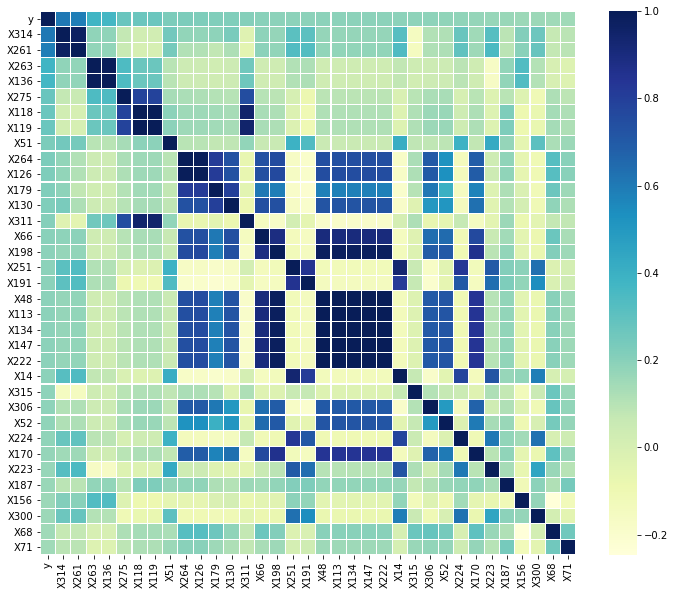

In [18]:
# y correlation matrix 
# k : number of variables for heatmap 
corrmat = data_train.corr()
k = 35
  
cols = corrmat.nlargest(k, 'y')['y'].index 
  
cm = np.corrcoef(data_train[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 

In [19]:
# See the correlations in descending order
correlation = data_train.corr() 
c1 = correlation.abs().unstack()
c1.sort_values(ascending = False)
c2 = c1[(c1 > 0.6) & (c1 < 1.0)]
c2


y     X314    0.606005
X14   X178    0.832712
      X191    0.819047
      X223    0.727050
      X224    0.779874
                ...   
X379  X63     0.911995
      X78     0.773115
      X174    0.737298
X382  X325    0.865197
X384  X366    0.632230
Length: 1296, dtype: float64

In [20]:
correlation = data_train.corr()

# Select upper triangle of correlation matrix
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
highVarianceColumns = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]

print("Total correlated columns are: ", len(highVarianceColumns), "\n")
print(highVarianceColumns)

Total correlated columns are:  96 

['X35', 'X37', 'X39', 'X54', 'X61', 'X66', 'X76', 'X84', 'X90', 'X94', 'X99', 'X101', 'X102', 'X111', 'X113', 'X119', 'X120', 'X122', 'X129', 'X130', 'X134', 'X136', 'X137', 'X140', 'X146', 'X147', 'X150', 'X157', 'X158', 'X162', 'X172', 'X179', 'X187', 'X194', 'X198', 'X199', 'X205', 'X213', 'X214', 'X215', 'X216', 'X217', 'X219', 'X222', 'X226', 'X227', 'X229', 'X232', 'X238', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X249', 'X250', 'X251', 'X253', 'X254', 'X262', 'X263', 'X264', 'X265', 'X266', 'X272', 'X276', 'X279', 'X296', 'X299', 'X302', 'X311', 'X314', 'X320', 'X324', 'X326', 'X328', 'X337', 'X346', 'X348', 'X352', 'X358', 'X360', 'X362', 'X363', 'X364', 'X365', 'X367', 'X368', 'X370', 'X371', 'X378', 'X379', 'X382', 'X385']


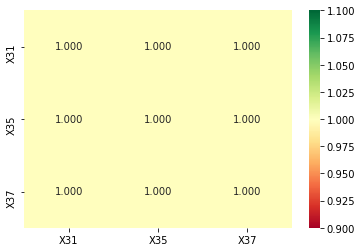

In [21]:
sns.heatmap(correlation.loc[correlation['X35'].abs() > 0.9, correlation['X35'].abs() > 0.9],
            annot=True, cmap = plt.cm.RdYlGn, fmt='.3f');

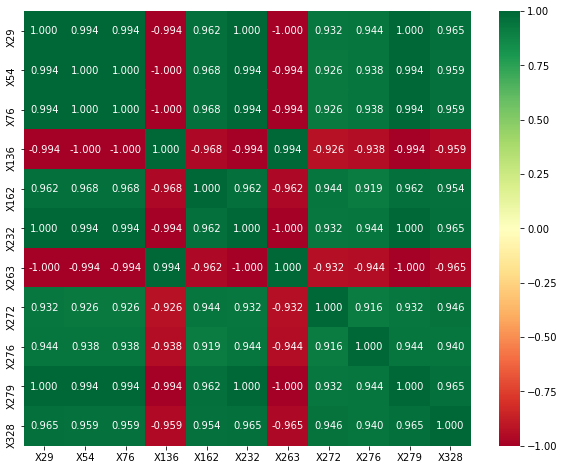

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation.loc[correlation['X328'].abs() > 0.9, correlation['X328'].abs() > 0.9],
            annot=True, cmap = plt.cm.RdYlGn, fmt='.3f');

In [23]:
data_train.drop(columns=highVarianceColumns, inplace=True)
data_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X369,X372,X373,X374,X375,X376,X377,X380,X383,X384
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,0,0,0,0,1,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,0,0,0,0,1,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,1,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### TASK 3: PERFORM LABEL ENCODING

In [24]:
data_train = pd.get_dummies(data_train)
data_train

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,8412,109.22,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,8415,87.48,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<p style="font-size:16px;"> Drop column <b>ID</b> as it doesn't add much value for the predcition</p>

In [25]:
data_train.drop(columns=['ID'], inplace=True)
data_train

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,107.39,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,108.77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,109.22,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,87.48,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<p style="font-size:16px;"><b>Separating out feature and label</b></p>

In [26]:
features = data_train.iloc[:,1:]
label = data_train.iloc[:,[0]]

In [27]:
print("features: ", features.shape)
print("label: ", label.shape)

features:  (4209, 455)
label:  (4209, 1)


In [28]:
features = features.values
label = label.values

In [29]:
print("Dimension of fatures: ", features.ndim, "\t", "Dimension of label: ", label.ndim)

Dimension of fatures:  2 	 Dimension of label:  2


### SPLIT DATA INTO TRAIN AND TEST DATA

In [30]:
import warnings
warnings.filterwarnings('ignore')
for i in range(1,50):
    
    X_train,X_test,y_train,y_test = train_test_split(features, label, test_size=0.2, random_state = i)
    model = XGBRegressor(silent=True)
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if (test_score > train_score) & (test_score>0.50):
        print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))

Test: 0.6444827791044088 , Train: 0.6110761425085149 , RS : 6
Test: 0.6401341449380258 , Train: 0.6065757998887893 , RS : 15
Test: 0.6457318117012941 , Train: 0.6213051003487318 , RS : 28
Test: 0.6219819275419418 , Train: 0.6130346889394838 , RS : 35
Test: 0.6360233881929578 , Train: 0.6197770488020218 , RS : 47
Test: 0.6413752229899747 , Train: 0.611340625487043 , RS : 48


<p style="font-size:16px"> Depending on the above scores, we would select <b>RS = 6 </b> </p>

In [31]:
X_train,X_test,y_train,y_test = train_test_split(features, label, test_size=0.2, random_state = 6)

### Standardizing the data

In [32]:
#Standardization(StandardScaler)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### TASK 4: Perform dimensionality reduction

In [33]:
#Initialize the PCA and detect the number of principal components
principalComponents = PCA(n_components=268) #Here n_components = n_features
principalComponents.fit(X_train,y_train)

PCA(copy=True, iterated_power='auto', n_components=268, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
principalComponents.explained_variance_ratio_

array([0.03276219, 0.03099206, 0.0256299 , 0.0224091 , 0.02020091,
       0.01966099, 0.01629651, 0.01327732, 0.01305413, 0.01254328,
       0.01221342, 0.01197116, 0.01132881, 0.01077079, 0.00984738,
       0.00962517, 0.00924217, 0.00913021, 0.0086869 , 0.00823618,
       0.0081454 , 0.00771756, 0.00766751, 0.00755758, 0.00733179,
       0.00705913, 0.00689946, 0.00674909, 0.0065778 , 0.00637849,
       0.00633609, 0.00622292, 0.00618318, 0.00596993, 0.00586744,
       0.00584933, 0.00575261, 0.00556362, 0.00553457, 0.00545574,
       0.00536391, 0.00529717, 0.00521834, 0.00517823, 0.00510933,
       0.00507732, 0.00499735, 0.00495575, 0.00491798, 0.00485265,
       0.00478039, 0.00470894, 0.0046652 , 0.00465883, 0.00461775,
       0.004517  , 0.00441146, 0.00438577, 0.00436555, 0.00428834,
       0.00422113, 0.00410308, 0.0040476 , 0.0039992 , 0.00398642,
       0.00392113, 0.00385836, 0.00372388, 0.00369651, 0.00368565,
       0.00362721, 0.00360797, 0.00357515, 0.00353117, 0.00351

In [35]:
#Step3: Apply PCA with correct n_components
principalComponentsFinal = PCA(n_components=20) #Here n_components = n_features
principalComponentsFinal.fit(X_train,y_train)
principalComponentsFinal.explained_variance_ratio_
X_train = principalComponentsFinal.transform(X_train)
X_test = principalComponentsFinal.transform(X_test)

In [36]:
finalModel = XGBRegressor(silent=True)
finalModel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [37]:
print("Train Score: ", finalModel.score(X_train,y_train))
print("Test Score: ", finalModel.score(X_test,y_test))

Train Score:  0.5779510553540685
Test Score:  0.5157504265294702


In [38]:
predictionValue = finalModel.predict(X_test)
list(predictionValue)[:8]

[94.65007,
 95.69327,
 114.153564,
 104.82117,
 93.4894,
 98.26983,
 93.15716,
 95.464325]

In [39]:
# Converting Dimensions of y_test from 2 to 1 dimension
y_test = y_test.ravel()

In [40]:
predictedFrame = pd.DataFrame(predictionValue, columns=['Predicted'])
targetFrame = pd.DataFrame(y_test, columns=['Target'])
Observed_Predicted_Table =pd.concat([targetFrame.reset_index(drop=True),predictedFrame],axis=1)
Observed_Predicted_Table.head()

,Target,Predicted
0,89.66,94.650070
1,88.62,95.693268
2,112.32,114.153564
3,106.88,104.821167
4,96.93,93.489403


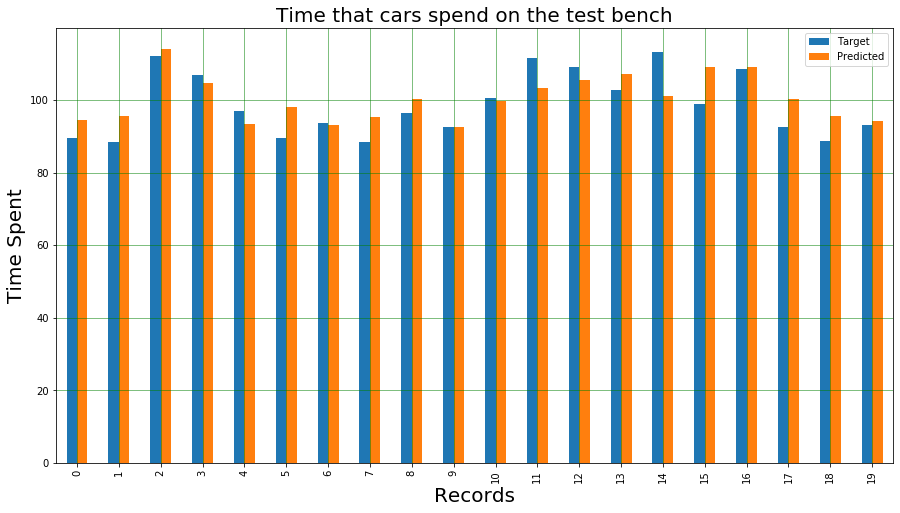

In [41]:
Observed_Predicted_Table_Split = Observed_Predicted_Table.head(20)
Observed_Predicted_Table_Split.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Records",  fontdict = {'fontsize' : 20})
plt.ylabel("Time Spent",  fontdict = {'fontsize' : 20})
plt.title("Time that cars spend on the test bench",  fontdict = {'fontsize' : 20})
plt.show()